# Knowledge Graph
#### Irfhana Zakir Hussain | RA1811027010100 | April 12, 2021

## Aim
- To perform information extraction and knowledge graph construction for the given text.
- Answer simple questions using the knowledge graph

## Manual Procedure
- Step 1: Identify Your Use Cases for Knowledge Graphs 
- Step 2: Inventory and Organize Relevant Data. 
- Step 3: Map Relationships Across Your Data. 
- Step 4: Conduct a Proof of Concept – Add Knowledge to your Data Using a Graph Database.

## Code

The -> nsubj
Chennai -> compound
Super -> compound
Kings -> nsubj
( -> punct
CSK -> appos
) -> punct
are -> ROOT
a -> det
franchise -> compound
cricket -> compound
team -> attr
based -> acl
in -> prep
Chennai -> pobj
, -> punct
Tamil -> compound
Nadu -> ROOT
, -> punct
which -> nsubj
plays -> relcl
in -> prep
the -> det
Indian -> amod
Premier -> compound
League -> pobj
( -> punct
IPL -> appos
) -> punct
. -> punct
  CSK franchise cricket Tamil which  Indian  Premier League
Founded -> advcl
in -> prep
2008 -> pobj
, -> punct
the -> det
team -> nsubj
plays -> ROOT
its -> poss
home -> compound
matches -> dobj
at -> prep
the -> det
M. -> compound
A. -> compound
Chidambaram -> compound
Stadium -> pobj
in -> prep
Chennai -> pobj
. -> punct
  team   home M. A. Chidambaram Chennai
The -> det
team -> nsubj
served -> ROOT
a -> det
two -> nummod
- -> punct
year -> compound
suspension -> dobj
from -> prep
the -> det
IPL -> pobj
starting -> prep
July -> pobj
2015 -> nummod
for -> prep
the -> det
al

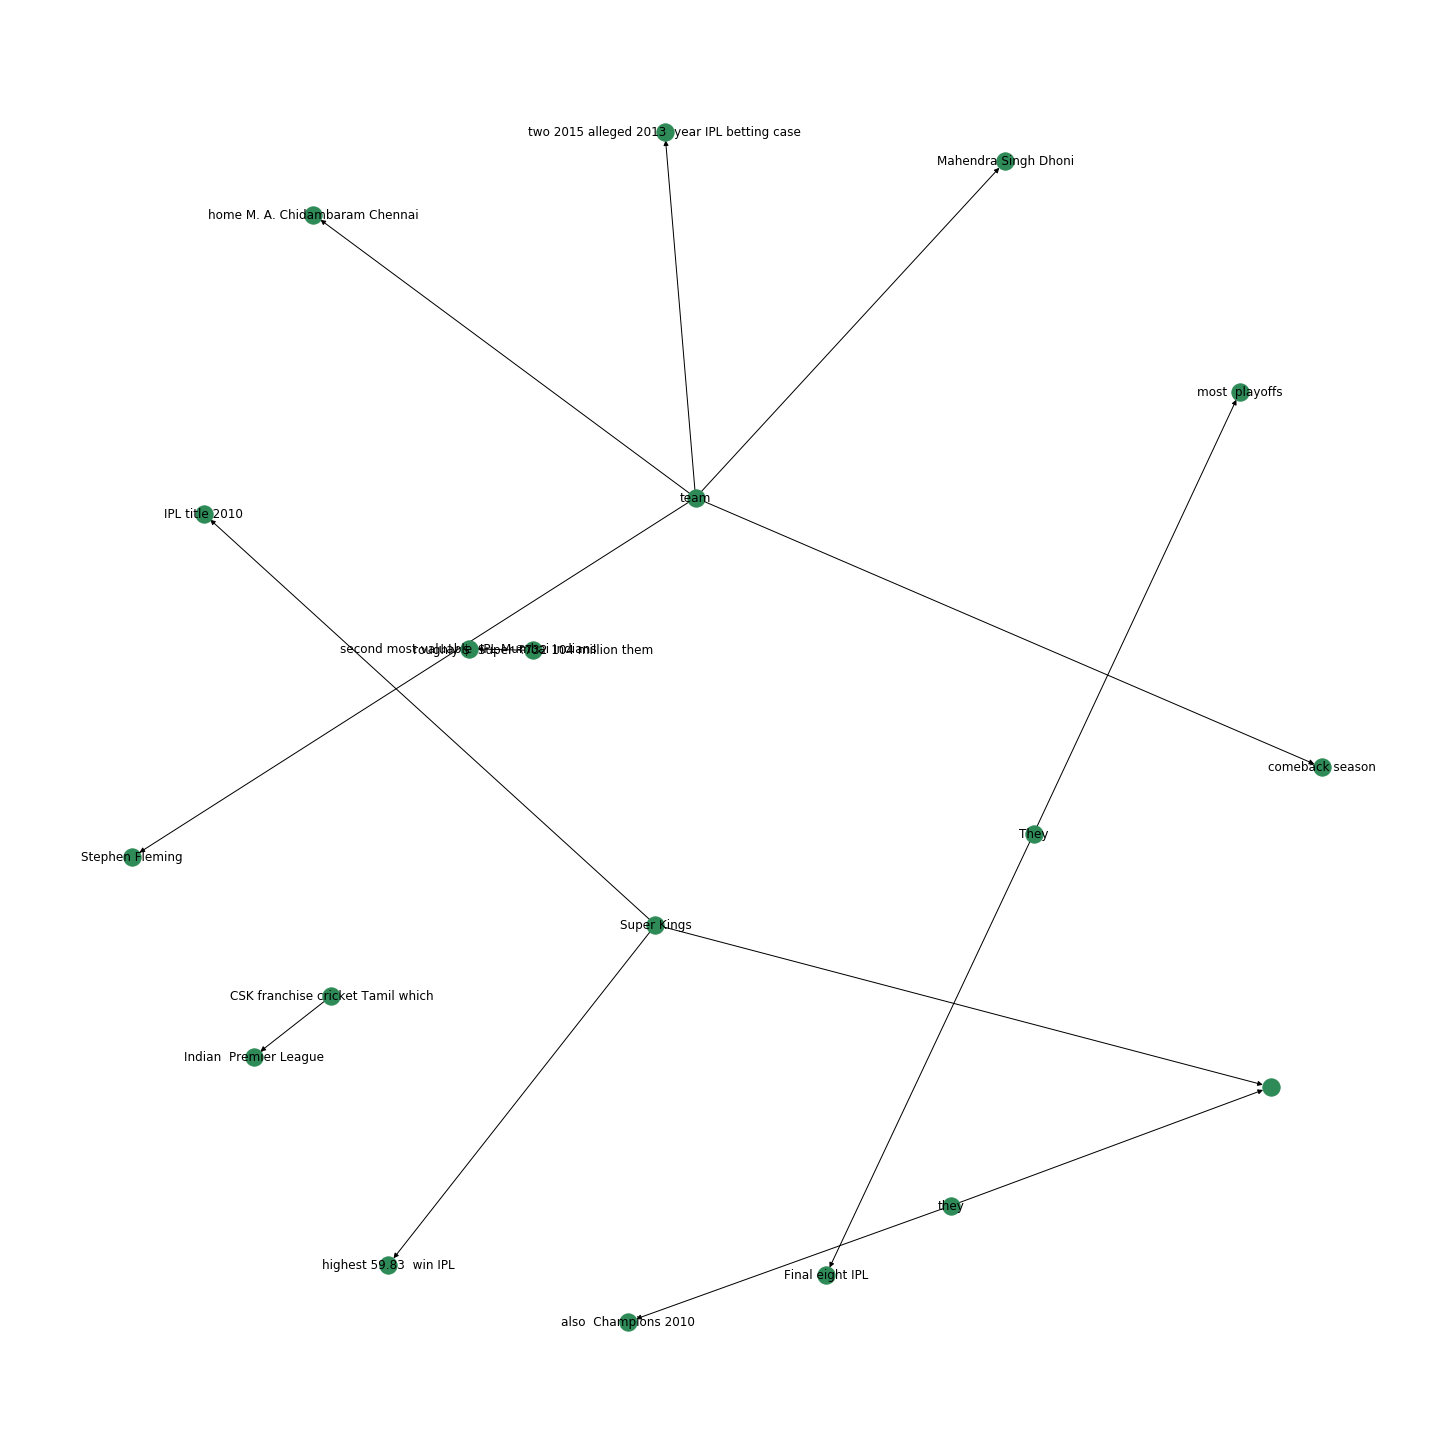

Enter the Question (Enter 0 to Exit): Who is captain of CSK?
Answer: The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, The team is captained by Mahendra Singh Dhoni and coached by Stephen Fleming. 
_____________________________________________________________________________________________________
Enter the Question (Enter 0 to Exit): What is winning percentage of CSK?
Answer: The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, The team served a two-year suspension from the IPL starting July 2015 for the alleged involvement of their owners in the 2013 IPL betting case, and won the title in its comeback season. The Super Kings have lifted the IPL title thrice (in 2010, 2011 and 2018), and have the highest win percentage of matches among all teams in the IPL (59.83 %). In addition, they have also won the Champions League Twenty20 in 2010 and 2014. 
________________________________________________________________________________________

In [9]:
import spacy
import re
import difflib
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def sentences(txt):
    lang = English()
    lang.add_pipe(lang.create_pipe('sentencizer'))
    txt = lang(txt)
    sentences = [(str(sentence)).strip() for sentence in txt.sents]
    return sentences
def process(lemmes, sub = ""):
    sub = sub
    sub1 = False
    obj = ""
    prev_dep = ""
    prev_text = ""
    prefix = ""
    modifier = ""
    relation = ""
    for i in range(len(lemmes)):
        lem = lemmes[i]
        txt = lem.text
        tag = lem.dep_
        print(txt, '->', tag)
        if tag in ["ROOT", "adj", "attr", "agent"]: #get relation
          relation = relation + " " + txt
        if tag == "punct":
            continue
        if tag == "compound" or tag == 'appos': #compunds and appos give context to the subj/obj
          if prev_dep == "compound" or prev_dep == "conj":
            prefix = prefix + " " + prev_text + " " + txt
            continue
          prefix = prefix + " " + txt
          continue
        if tag.endswith("mod") == True: #number details
          if prev_dep == "compound" or prev_dep == "appos" or prev_dep == "conj":
            modifier = modifier + " " + prev_text + " " + txt
            continue
          modifier = modifier + " " + txt
          if prev_dep.find("obj") == True: #if number shows up after the obj then obj should be modified to include number
            obj = modifier + " " + prefix + " " + prev_text
            continue
        if tag.find("subj") == True:
            sub = modifier + " " + prefix + " " + txt
            prefix = "" #need to reset all the parts of the sentence to get ready for obj
            modifier = ""
            prev_dep = ""
            prev_text = ""
        if tag.find("obj") == True:
            obj = modifier + " " + prefix + " " + txt
        if tag == "cc":
           sub1 = process(lemmes[(i+1):], sub)
           break
        prev_dep = tag
        prev_text = txt
    print(sub, obj)
    if sub1:
      return [sub.strip(), obj.strip(), relation], sub1
    return [sub.strip(), obj.strip(), relation]

"""def find_relation(sentence):
  lemmes = model(sentence)
  matcher = spacy.matcher.Matcher(model.vocab)
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}]
  matcher.add("matching_1", None, pattern)
  matches = matcher(lemmes)
  print(matches)
  n = len(matches) - 1
  span = lemmes[matches[n][1]:matches[n][2]]
  return span.text"""

def display(nodes): #creates knowledge graph for all text
  knowledge_graph = nx.from_pandas_edgelist(nodes, "subject", "obj", edge_attr=True, create_using=nx.MultiDiGraph())
  plt.figure(figsize = (20, 20))
  pos = nx.spring_layout(knowledge_graph)
  nx.draw(knowledge_graph, with_labels = True, node_color = "seagreen", edge_cmap = plt.cm.Blues, pos = pos)
  plt.show()

"""def get_answer(nodes, relation, entity_pair): #creates answer graph for question
  knowledge_graph = nx.from_pandas_edgelist(nodes[nodes["edge"] == relation], "subject", "obj", edge_attr=True, create_using=nx.MultiDiGraph())
  plt.figure(figsize = (20, 20))
  pos = nx.spring_layout(knowledge_graph)
  nx.draw(knowledge_graph, with_labels = True, node_color = "seagreen", edge_cmap = plt.cm.Blues, pos = pos)
  plt.show()  """

model = spacy.load('en_core_web_sm')

# Check if the token is a word or not
def is_token_allowed(token):
    if (not token or token.is_stop or token.is_punct):
        return False
    return True

# Reduce token to its lowercase lemma form, where lemma is the base form of the word
def preprocess_token(token):
    return token.lemma_.strip().lower()

def main():
    text = "The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). Founded in 2008, the team plays its home matches at the M. A. Chidambaram Stadium in Chennai. The team served a two-year suspension from the IPL starting July 2015 for the alleged involvement of their owners in the 2013 IPL betting case, and won the title in its comeback season. The team is captained by Mahendra Singh Dhoni and coached by Stephen Fleming. The Super Kings have lifted the IPL title thrice (in 2010, 2011 and 2018), and have the highest win percentage of matches among all teams in the IPL (59.83 %). They hold the records of most appearances in the playoffs (ten) and the Final (eight) of the IPL. In addition, they have also won the Champions League Twenty20 in 2010 and 2014. The brand value of the Super Kings in 2019 is estimated to be around ₹732 crore (roughly $104 million), making them the second-most valuable IPL franchise, after the Mumbai Indians."
    lines = sentences(text)
    sentss = list((model(text)).sents)
    entities = []
    for line in lines:
      listt = process(model(line))
      if type(listt) == tuple:
        for entity_pair in listt:
          if type(entity_pair) == tuple:
            for ep in entity_pair:
              entities.append(ep)
          else:
            entities.append(entity_pair)
      else:
        entities.append(listt)
    relations = [i[2] for i in entities]
    subject = [i[0] for i in entities]
    obj = [i[1] for i in entities]
    print(len(subject))
    print(len(obj))
    print(len(relations))
    nodes = pd.DataFrame({'subject' : subject, 'obj' : obj, 'edge' : relations})
    display(nodes)
    questions = []
    while True:
        ques = input('Enter the Question (Enter 0 to Exit): ')
        if (ques == '0'):
            break

        qdoc = model(ques)
        # Preprocessing the tokens in the given question
        ques_token = [preprocess_token(token) for token in qdoc if is_token_allowed(token)]

        print('Answer: ', end = "")
        for sentence in sentss:
            # Preprocessing the tokens in each sentence
            final_token = [preprocess_token(token) for token in sentence if is_token_allowed(token)]
            for qtoken in ques_token:
                # Printing the sentences that contain the question's token
                if qtoken in final_token:
                    print(sentence, end = " ")
                    break
        print()
        print("_____________________________________________________________________________________________________")

main()

## Results:
- The knowledge representation graph was successfully built and can accurately answer questions about the given text.